6章 テキストとシーケンスのためのディープラーニング
=========================================

## 1.テキストデータの操作

> 単語レベルでの単純なone-hotエンコーディング

In [1]:
import numpy as np

# 初期データ：サンプルごとにエントリが1つ含まれている
# (この単純な例では、サンプルは単なる1つの文章だが、文書全体でも良い)
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# データに含まれている全てのトークンのインデックスを構築
token_index = {}
for sample in samples:
    # ここでは単にsplitメソッドを使って、サンプルをトークン化する
    # 実際には、サンプルから句読点と特殊な文字を取り除くことになる
    for word in sample.split():
        if word not in token_index:
            # 一意な単語にそれぞれ一意なインデックスを割り当てする
            # インデックス0をどの単語にも割り当てないことに注意
            token_index[word] = len(token_index) + 1

# 次に、サンプルをベクトル化する：サンプルごとに最初のmax_length個の単語だけを考慮
max_length = 10

# 結果の格納場所
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.

In [2]:
print(token_index)

{'The': 1, 'cat': 2, 'sat': 3, 'on': 4, 'the': 5, 'mat.': 6, 'dog': 7, 'ate': 8, 'my': 9, 'homework.': 10}


In [3]:
print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


> 文字レベルでの単純なone-hotエンコーディング

In [4]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable  # 全て印字可能なASCII文字
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i, j, index] = 1.

In [5]:
print(token_index)

{'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10, 'a': 11, 'b': 12, 'c': 13, 'd': 14, 'e': 15, 'f': 16, 'g': 17, 'h': 18, 'i': 19, 'j': 20, 'k': 21, 'l': 22, 'm': 23, 'n': 24, 'o': 25, 'p': 26, 'q': 27, 'r': 28, 's': 29, 't': 30, 'u': 31, 'v': 32, 'w': 33, 'x': 34, 'y': 35, 'z': 36, 'A': 37, 'B': 38, 'C': 39, 'D': 40, 'E': 41, 'F': 42, 'G': 43, 'H': 44, 'I': 45, 'J': 46, 'K': 47, 'L': 48, 'M': 49, 'N': 50, 'O': 51, 'P': 52, 'Q': 53, 'R': 54, 'S': 55, 'T': 56, 'U': 57, 'V': 58, 'W': 59, 'X': 60, 'Y': 61, 'Z': 62, '!': 63, '"': 64, '#': 65, '$': 66, '%': 67, '&': 68, "'": 69, '(': 70, ')': 71, '*': 72, '+': 73, ',': 74, '-': 75, '.': 76, '/': 77, ':': 78, ';': 79, '<': 80, '=': 81, '>': 82, '?': 83, '@': 84, '[': 85, '\\': 86, ']': 87, '^': 88, '_': 89, '`': 90, '{': 91, '|': 92, '}': 93, '~': 94, ' ': 95, '\t': 96, '\n': 97, '\r': 98, '\x0b': 99, '\x0c': 100}


In [6]:
print(results.shape)

(2, 50, 101)


> Kerasを使った単語レベルでのone-hotエンコーディング

In [7]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 出現頻度が最も高い1,000個数の単語だけを処理するように設定された
# トークナイザを作成
tokenizer = Tokenizer(num_words=1000)

# 単語のインデックスを構築
tokenizer.fit_on_texts(samples)

# 文字列をインデックスのリストに変換
sequences = tokenizer.texts_to_sequences(samples)

# 二値のone-hotエンコーディング表現を直接取得することも可能
# one-hotエンコーディング以外のベクトル化モードもサポートされている
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# 計算された単語のインデックスを復元する方法
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.


Found 9 unique tokens.


In [8]:
print(sequences)

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]


In [9]:
print(one_hot_results.shape)

(2, 1000)


> ハッシュトリックを用いた単語レベルの単純なone-hotエンコーディング

In [10]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# 単語をサイズが1,000のベクトルとして格納
# 単語の数が1,000個に近い(またはそれ以上である)場合は、
# ハッシュ衝突が頻発し、このエンコーディング手法の精度が低下することに注意
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        # 単語をハッシュ化し、0~1000のランダムな整数に変換
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [11]:
print(results.shape)

(2, 10, 1000)


## 2.単語埋め込み

> Enbedding層をインスタンス化

In [12]:
from keras.layers import Embedding

# Enbedding層の引数は少なくとも2つ:
#     有効なトークンの数：この場合は1,000(1+単語のインデックスの最大値)
#     埋め込み次元の数：この場合は64
embedding_layer = Embedding(1000, 64)

W0917 17:03:42.983547 4578538944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



> Enbedding層で使用するIMDbデータを読み込む

In [13]:
from keras.datasets import imdb
from keras import preprocessing

# 特徴量として考慮する単語の数
max_features = 10000

# max_features個の最も出現頻度の高い単語のうち、
# この数の単語を残してテキストをカット
maxlen = 20

# データを複数の整数リストとして読み込む
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 整数のリストを形状が(samples, max_len)の2次元整数テンソルに変換
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

> IMDbデータでEmbedding層と分類器を使用

In [14]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()

# あとから埋め込み入力を平坦化できるよう、Enbedding層に入力の長さとしてmax_lenを指定
# Enbedding層の後、活性化の形状は(samples, max_len, 8)になる
model.add(Embedding(10000, 8, input_length=maxlen))

# 埋め込みの3次元テンソルを形状が(samples, max_len * 8)の2次元テンソルに変換
model.add(Flatten())

# 最後に分類器を追加
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

W0917 17:03:47.909860 4578538944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 17:03:47.924341 4578538944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0917 17:03:47.965621 4578538944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0917 17:03:47.979615 4578538944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0917 17:03:47.984189 4578538944 deprecation.py:323] From /usr/local/lib/python3.6/site-packages/tensorflow

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 46us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/10
20000/20000 [==============================] - 1s 30us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/10
20000/20000 [==============================] - 1s 31us/step - loss: 

> 元のIMDbデータセットのラベルを処理

In [17]:
import os

imdb_dir = '/Users/kunii.sotaro/Downloads/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [26]:
# labels：0と1の二値分類
print(labels[1])
print(texts[1])

0
Well...tremors I, the original started off in 1990 and i found the movie quite enjoyable to watch. however, they proceeded to make tremors II and III. Trust me, those movies started going downhill right after they finished the first one, i mean, ass blasters??? Now, only God himself is capable of answering the question "why in Gods name would they create another one of these dumpster dives of a movie?" Tremors IV cannot be considered a bad movie, in fact it cannot be even considered an epitome of a bad movie, for it lives up to more than that. As i attempted to sit though it, i noticed that my eyes started to bleed, and i hoped profusely that the little girl from the ring would crawl through the TV and kill me. did they really think that dressing the people who had stared in the other movies up as though they we're from the wild west would make the movie (with the exact same occurrences) any better? honestly, i would never suggest buying this movie, i mean, there are cheaper ways to 

> IMDbデータのテキストをトークン化

In [28]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # 映画レビューを100ワードでカット
training_samples = 200  # 200個のサンプルで訓練
validation_samples = 10000  # 10,000個のサンプルで検証
max_words = 10000  # データセットの最初から10,000ワードのみを考慮

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# データを訓練データセットと検証データセットに分割：
# ただし、サンプルが順番に並んでいる(否定的なレビューの後に肯定的なレビューが配置されている)
# 状態のデータを使用するため、最初のデータをシャッフル
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


> GloVeの単語埋め込みファイルを解析

In [30]:
glove_dir = '/Users/kunii.sotaro/Downloads/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [31]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # 埋め込みインデックスで見つからない単語は0で埋める
            embedding_matrix[i] = embedding_vector

In [33]:
print(embedding_matrix.shape)

(10000, 100)


> モデルの定義

In [34]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


> GloVeの埋め込みをモデルに埋め込む

In [35]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

> モデルの訓練と評価

In [36]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 1.9463 - acc: 0.5050 - val_loss: 0.6909 - val_acc: 0.5339
Epoch 2/10
200/200 [==============================] - 0s 862us/step - loss: 0.5852 - acc: 0.7050 - val_loss: 0.9231 - val_acc: 0.5087
Epoch 3/10
200/200 [==============================] - 0s 826us/step - loss: 0.5331 - acc: 0.7850 - val_loss: 0.6861 - val_acc: 0.5544
Epoch 4/10
200/200 [==============================] - 0s 872us/step - loss: 0.3303 - acc: 0.8900 - val_loss: 1.3562 - val_acc: 0.5101
Epoch 5/10
200/200 [==============================] - 0s 914us/step - loss: 0.4251 - acc: 0.7700 - val_loss: 0.7641 - val_acc: 0.5427
Epoch 6/10
200/200 [==============================] - 0s 858us/step - loss: 0.1971 - acc: 0.9400 - val_loss: 1.0271 - val_acc: 0.4977
Epoch 7/10
200/200 [==============================] - 0s 856us/step - loss: 0.1541 - acc: 0.9750 - val_loss: 0.7144 - val_acc: 0.5748
Epoch 8/10
200/2

> 結果をプロット

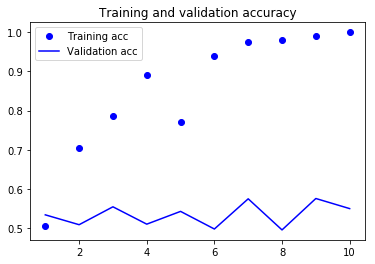

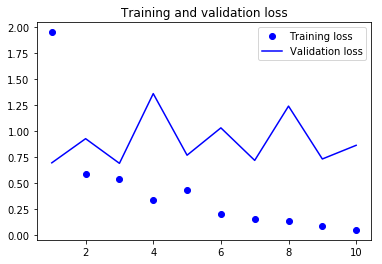

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

> 学習済みの単語埋め込みを使用せずに同じモデルを訓練

In [39]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6941 - acc: 0.4950 - val_loss: 0.6955 - val_acc: 0.5178
Epoch 2/10
200/200 [==============================] - 0s 1ms/step - loss: 0.5001 - a

> テストデータセットのデータをトークン化

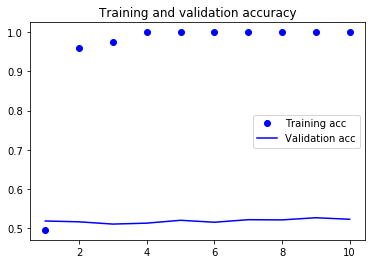

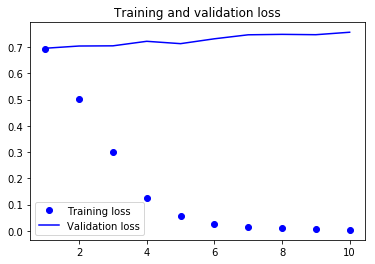

In [40]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

> テストデータセットのデータをトークン化

In [41]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

> モデルをテストデータセットで評価

In [42]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 26us/step


[0.8715075751686097, 0.54584]